In [1]:
#Importação da bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/main/dados_limpos.csv"
dados = pd.read_csv(url, sep=",")

dados.columns

# --- Carregar e preparar os dados ---

url1 = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/refs/heads/main/Dados%20sobre%20Desmatamento/area_desmatada_municipio.csv"
dados_desmatamento = pd.read_csv(url1, sep=",")

# Renomear colunas para mesclar
dados = dados.rename(columns={'Ano': 'ano', 'CDMunicipio': 'id_municipio'})

# Mesclar os dois datasets
df = pd.merge(dados, dados_desmatamento, on=['ano', 'id_municipio'], how='inner')

# Selecionar colunas relevantes
df = df[['VlProducaoAgricola', 'AreaPlantada_h', 'VlProducaoPecuaria', 'Area','NrNascimentos', 'QtEmpresas', 'PessoalAssalariado', 'PessoalOcupado', 'Populacao', 'desmatado']].copy()

# 🟤 Municípios com maior produção agrícola tendem a ter maior área desmatada?

Dando continuidade à análise anterior com regressão linear, aplicamos agora o algoritmo Random Forest, mais adequado ao comportamento não linear dos dados observados. Como discutido anteriormente, as variáveis relacionadas à produção agrícola apresentam distribuições assimétricas e relações complexas com o desmatamento, o que limita o desempenho de modelos lineares.

O uso do Random Forest permite capturar interações e padrões não lineares entre as variáveis, oferecendo uma abordagem mais robusta para investigar a seguinte questão: municípios com maior produção agrícola tendem a ter maior área desmatada?. A análise a seguir busca explorar essa relação de forma mais precisa, avaliando o impacto da produção agropecuária sobre a área desmatada com base nas predições do modelo.

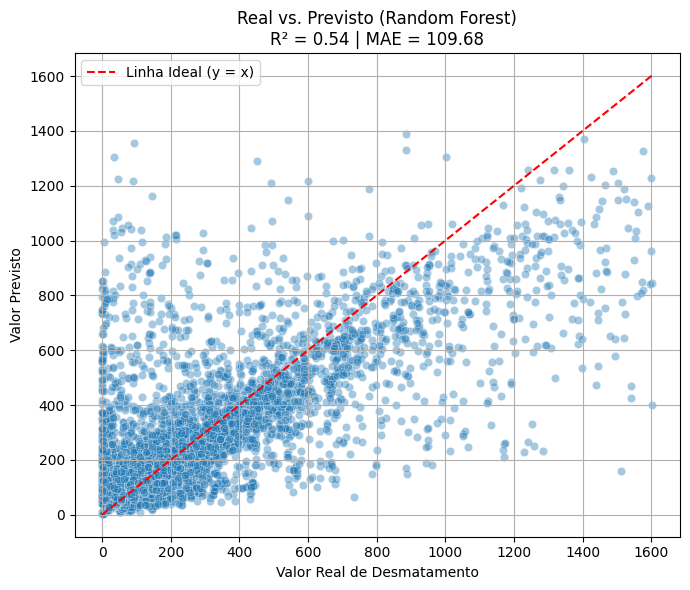

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]


# Definir variáveis
X = df.drop(columns=['NrNascimentos', 'QtEmpresas', 'PessoalAssalariado', 'PessoalOcupado', 'Populacao', 'desmatado'])
y = df['desmatado']

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Previsão
y_pred = rf.predict(X_test)

# Avaliar desempenho
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Gráfico Real vs. Previsto
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', label='Linha Ideal (y = x)')

plt.title(f'Real vs. Previsto (Random Forest)\nR² = {r2:.2f} | MAE = {mae:.2f}', fontsize=12)
plt.xlabel('Valor Real de Desmatamento')
plt.ylabel('Valor Previsto')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusão:

A aplicação do modelo Random Forest representou uma melhoria significativa em relação ao modelo de regressão linear com variáveis log-transformadas. Enquanto a regressão linear alcançou um R² de 37,7% e MAE de 266,85, o Random Forest elevou o R² para 54% e reduziu o erro médio absoluto para 109, dobrando a capacidade explicativa do modelo e cortando o erro pela metade.

Essa melhora reforça o entendimento de que o desmatamento é um fenômeno não linear e multifatorial. Modelos como o Random Forest, conseguem capturar relações mais complexas entre as variáveis agropecuárias e a área desmatada, tornando-se uma alternativa mais eficaz para previsão e análise nesse contexto.

## Análise dos outros fatores

Para explorar melhor o caráter multivariado do desmatamento, foram adicionadas variáveis socioeconômicas ao modelo, como número de nascimentos, quantidade de empresas, pessoal assalariado e população. Essa inclusão busca ampliar a compreensão dos determinantes do desmatamento além das atividades agropecuárias, buscando reconhecer que fatores sociais e econômicos também exercem influência importante nesse fenômeno complexo.

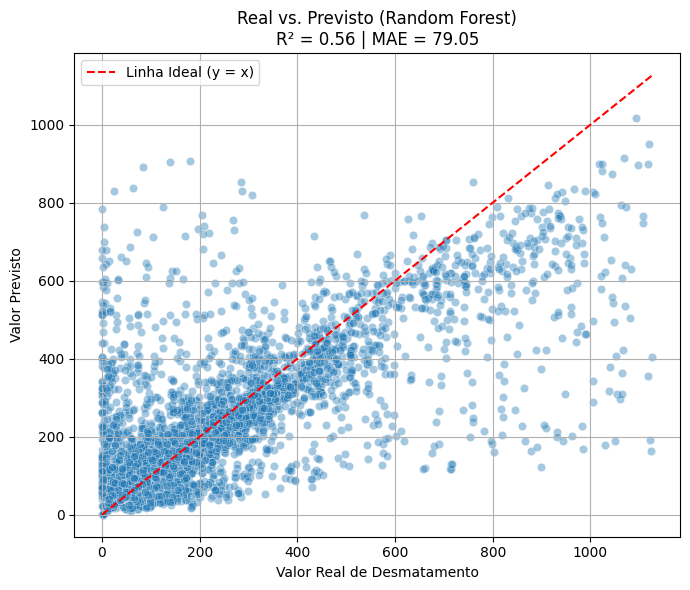

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

from scipy import stats
import numpy as np


z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]


# Definir variáveis
X = df.drop(columns=['desmatado'])
y = df['desmatado']

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Previsão
y_pred = rf.predict(X_test)

# Avaliar desempenho
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Gráfico Real vs. Previsto
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', label='Linha Ideal (y = x)')

plt.title(f'Real vs. Previsto (Random Forest)\nR² = {r2:.2f} | MAE = {mae:.2f}', fontsize=12)
plt.xlabel('Valor Real de Desmatamento')
plt.ylabel('Valor Previsto')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusão:
Comparado ao modelo anterior de Random Forest, que apresentou MAE de 124, o modelo atual alcançou uma redução muito significativa do erro médio absoluto, chegando a 79, além de aumentar o R² para 56%. Essa melhora expressiva no MAE indica que as previsões estão muito mais próximas dos valores reais, tornando o modelo consideravelmente mais confiável e preciso.

Esses resultados destacam a eficácia do ajuste do modelo e a importância de incluir variáveis relevantes para capturar a complexidade não linear e multifatorial do desmatamento.


## 🟤 Resposta Para a Pergunta

Os resultados obtidos indicam uma relação positiva entre a produção agrícola e o desmatamento, especialmente com destaque para variáveis como área total e produção pecuária, que apresentaram maior importância no modelo. O uso do Random Forest permitiu evidenciar essa tendência ao lidar melhor com a complexidade dos dados. Assim, podemos afirmar que, de forma geral, municípios com maior atividade agropecuária tendem a apresentar maiores áreas desmatadas, ainda que outros fatores também influenciem esse processo.








